### 3 distinct clusters:
- Georges Cuvier's findings are reflected here: Mongoloid, Cuacazoid, Negroid. This is a racey topic as such I'll stay away from writing about it.


- The majority of the clusters are white americans, this also displays the number of opportunities which we have to consider a person of from this cluster. 

    Minority clusters: blacks and asian. which compose the minority of my swipes

    My mom and women of my family fall into the majority cluster, people in the majority of the clusters are multiethnical and not just white anglo-saxon american.

    the majority cluster is very well rounded with my friends occupying the small corner of it, consistently.

    the black minority cluster seems small and elongated where as the asians seem fairly well clustered and the furthest away and the black cluster is consistently portrayed.

    _can we assume the picture in the middle of each of the clusters are an average representation ( centeroid ) of the cluster?_
YES

### A size dimension is missing from this..

![title](messaging_racial_patterns.jpg)

- Something the ethnicity to demograph pics do not display is the size of these cohorts which have a major influence on percentages, so if white guys happen to be drawn most to asian women, it's going to make it seem like asian women get the most amount of attention (caveat being, from white guys, swing voters).



- This should definitely answer the question which ethnicity do I look more apart of. Theoretically jamie and justin should fall inbetween



In [98]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from image_helpers import _square_sizer
from tsne import image_scatter_plot
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/tinder_pics_dislikes_faces_firsts_deduped_encodings.pickle')
data_, paths_, encodings_, arrays_rescaled_, X_ = load_encodings('../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle')
arrays_rescaled.extend(arrays_rescaled_) , encodings.extend(encodings_), paths.extend(paths_)

(None, None, None)

In [100]:
X = np.concatenate((X, X_)) 
len(encodings), len(paths), len(arrays_rescaled), X.shape[0]

(743, 743, 743, 743)

In [101]:
num_of_likes = len(data_)
num_of_likes

105

In [102]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":10,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.01,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}

# umap_embeddings = UMAP(**params).fit_transform(encodings)

# xx = umap_embeddings[:, 0]
# yy = umap_embeddings[:, 1]


/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


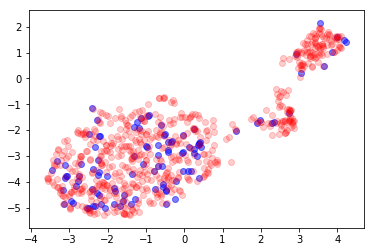

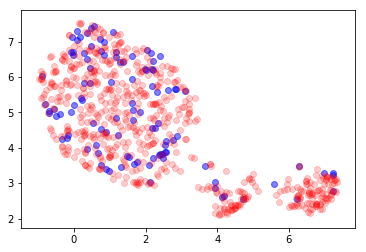

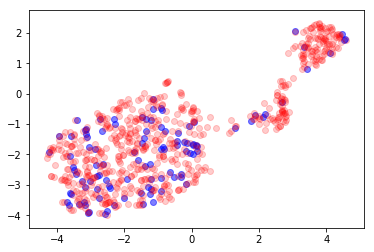

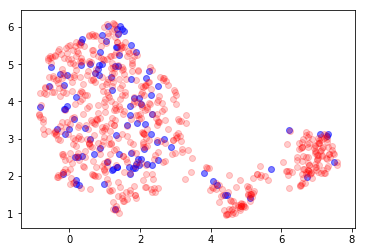

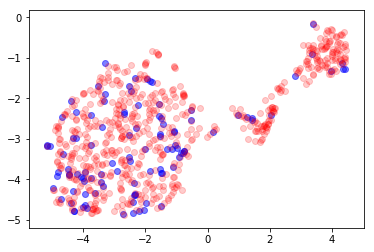

In [103]:
for _ in range(1,6):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y,in zip(xx[-num_of_likes:], yy[-num_of_likes:]): 
        plt.scatter(x, y, color='b', alpha=0.5)

    for x, y in zip(xx[:-num_of_likes], yy[:-num_of_likes]): 
        plt.scatter(x, y, color='r', alpha=0.2)
    plt.show()

/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


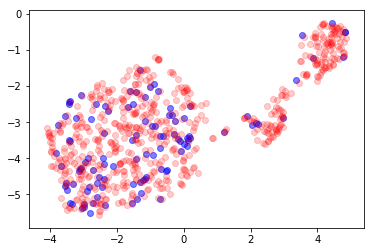

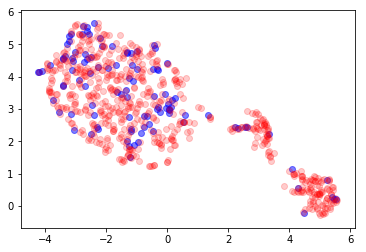

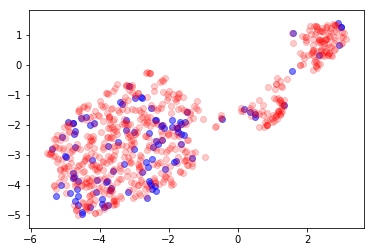

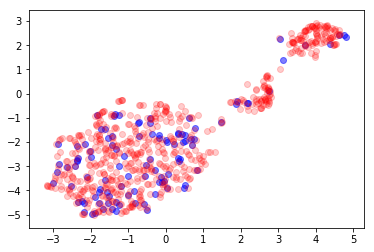

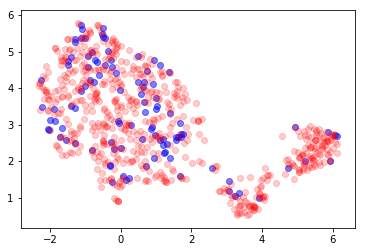

In [104]:
for _ in range(1,6):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y,in zip(xx[-num_of_likes:], yy[-num_of_likes:]): 
        plt.scatter(x, y, color='b', alpha=0.5)

    for x, y in zip(xx[:-num_of_likes], yy[:-num_of_likes]): 
        plt.scatter(x, y, color='r', alpha=0.2)
    plt.show()

In [105]:
plot_data = image_scatter_plot(
                tsne_scatter_plot=umap_embeddings, 
                images=X, 
                res=5000
            )

print(plot_data.shape)
im = Image.fromarray(np.uint8(plot_data))
im.show()



(8162, 5128, 3)


In [106]:
data__, paths__, encodings__, arrays_rescaled__, X__ = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')
arrays_rescaled.extend(arrays_rescaled__) , encodings.extend(encodings__), paths.extend(paths__)
X = np.concatenate((X, X__)) 
len(encodings), len(paths), len(arrays_rescaled), X.shape[0]

(759, 759, 759, 759)

In [107]:
num_of_friends = len(data__)

/Users/ajay/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


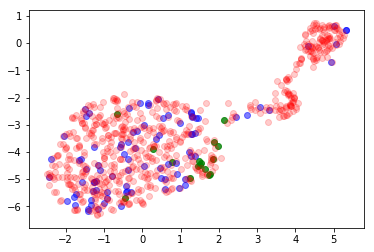

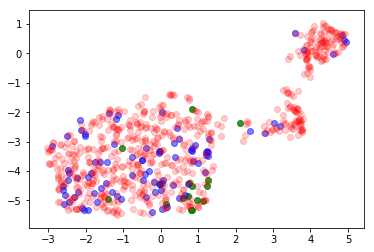

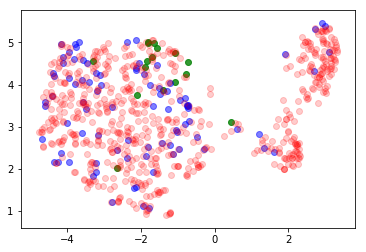

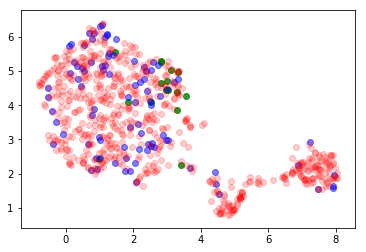

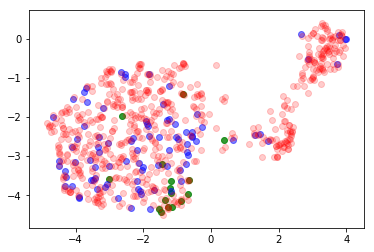

In [110]:
for _ in range(1,6):
    umap_embeddings = UMAP(**params).fit_transform(encodings)

    xx = umap_embeddings[:, 0]
    yy = umap_embeddings[:, 1]

    for x, y,in zip(xx[-num_of_friends:], yy[-num_of_friends:]): 
        plt.scatter(x, y, color='g', alpha=.8)

    for x, y,in zip(xx[-num_of_likes:-num_of_friends], yy[-num_of_likes:-num_of_friends]): 
        plt.scatter(x, y, color='b', alpha=0.5)

    for x, y in zip(xx[:-num_of_likes], yy[:-num_of_likes]): 
        plt.scatter(x, y, color='r', alpha=0.2)
    plt.show()


In [111]:
plot_data = image_scatter_plot(
                tsne_scatter_plot=umap_embeddings, 
                images=X, 
                res=5000
            )

print(plot_data.shape)
im = Image.fromarray(np.uint8(plot_data))
im.show()

im.save('tsne_trials/tinder_likes_vs_dislikes_friends_myself.png')

(9113, 5128, 3)


![title](tsne_trials/tinder_likes_vs_dislikes_friends_myself.png)

In [92]:
params = {
    'min_cluster_size': 7,
    'allow_single_cluster':False,
    'min_samples':1,
    }

clt = hdbscan.HDBSCAN(**params)
clt.fit(encodings)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=7, min_samples=1, p=None,
    prediction_data=False)

## Indians fall into the main clusters

Note the distinct black cluster, asian cluster, and white/indian cluster. Further supports our findings that from a dissimilarity standpoint they're the same.

-1


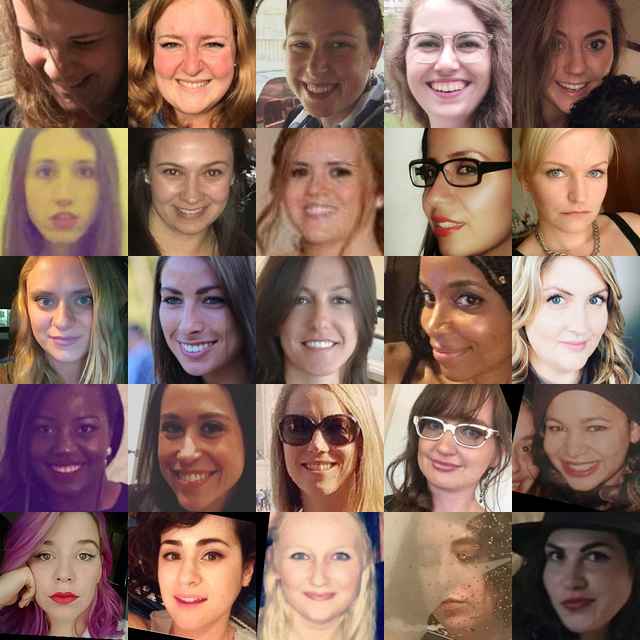

0


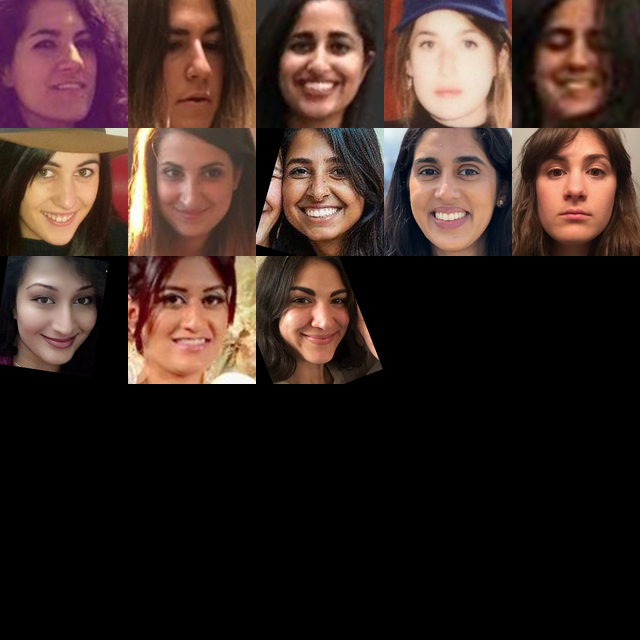

1


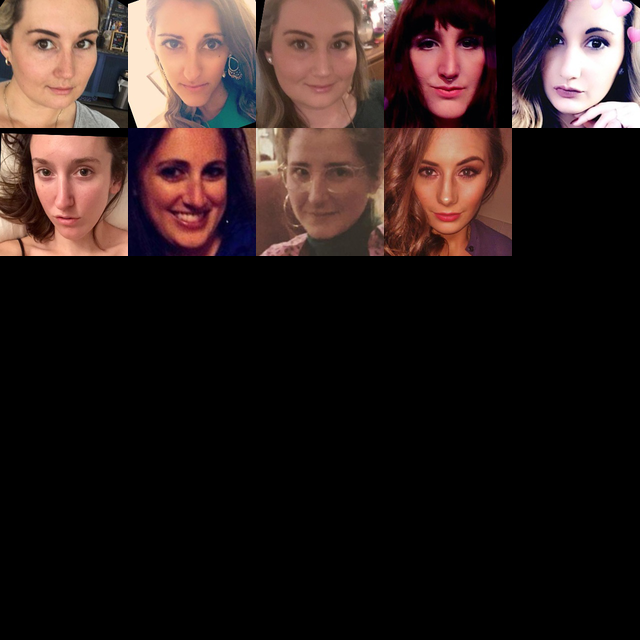

2


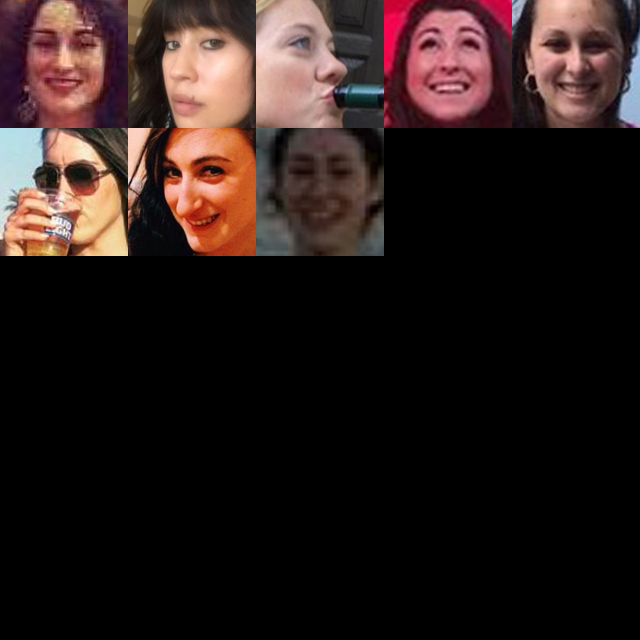

3


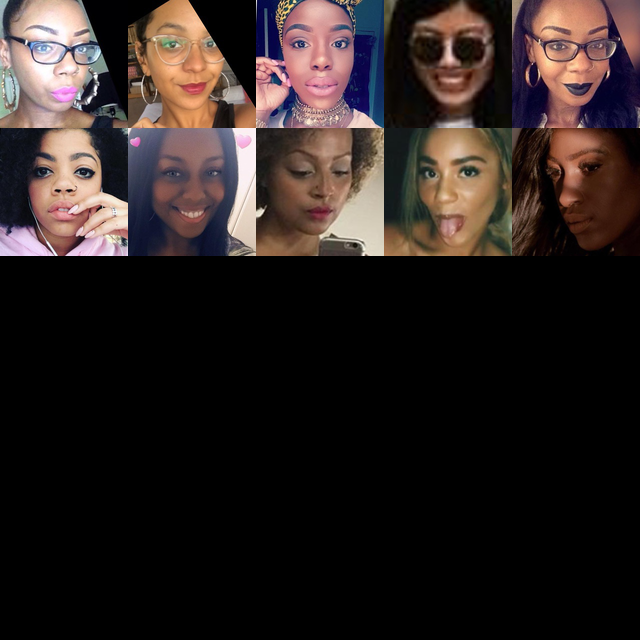

4


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


5


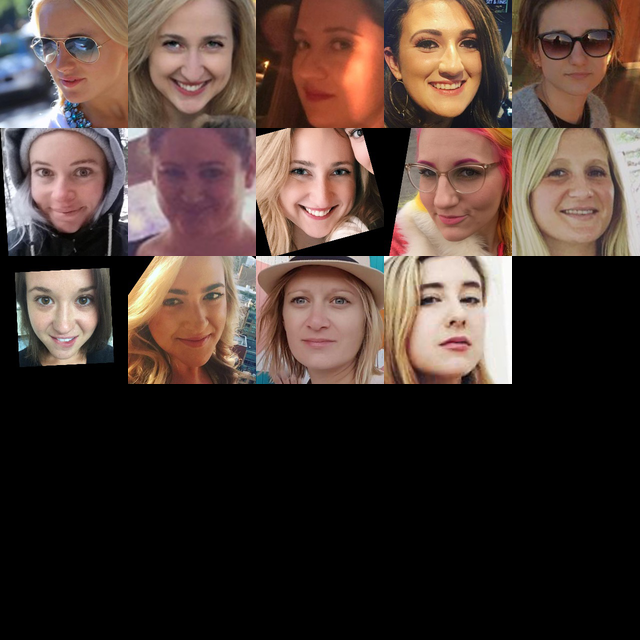

6


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [115]:
for cluster_idx in np.unique(clt.labels_):
    print(cluster_idx)
    args = np.where(clt.labels_== cluster_idx)[0]
    display(montagify([np.array(arrays_rescaled[arg]) for arg in args],
    (128,128), 
#     tiles=_square_sizer(len(args))))
    tiles=(5,5)))
